In [2221]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sn
import neattext as nt
from colorama import Fore
from nltk import word_tokenize
import neattext.functions as nf
import matplotlib.pyplot as plt

In [2222]:
from sklearn.svm import SVC,LinearSVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers.core import Dense,Flatten,Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [2223]:
import tensorflow as tf
from tensorflow.python.eager import context
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.python import pywrap_tensorflow as _pywrap_tensorflow
from keras.layers import Dropout,Activation,Bidirectional,GlobalMaxPool1D
from keras.layers import Input,Dense,Embedding,Flatten,BatchNormalization,Masking,GRU,LayerNormalization

In [2224]:
#To get the same result after each run
random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)

In [2225]:
# Two different graphs to show the number of articles in each class
def pie_chart():
    count_category=df['Category'].value_counts()
    plt.figure(figsize=(4,4))
    colors=['#C71585','lightcyan','cyan','royalblue','darkblue']
    plt.pie(count_category.values,autopct='%1.1f%%',startangle=140,shadow=True,labels=['Business','Entertainment','Sport','Politics','Tech'],colors=colors)
    plt.title('Article Classes',size=10,color='g')
    plt.show()
    
def bar_chart():
    dc2.plot.bar()
    plt.tick_params(axis='x',rotation=30)
    plt.show()

In [2226]:
#Calculate the evaluation for each model
def evaluate(model_name,X_test, y_test):
    score=model_name.evaluate(X_test, y_test, verbose=0)
    print(model_name.metrics_names[1], score[1]*100 , model_name.metrics_names[0], score[0]*100)

In [2227]:
#Accuracy and loss plot of training and testing data for each model
def plot_loss_accuracy(ax):
    plt.subplots(1,3,figsize=(18,5))
    
    plt.subplot(1,3,1)
    plt.plot(ax.history['loss'],label='Loss')
    plt.plot(ax.history['accuracy'],label='Accuracy')
    plt.title('Train Data'),plt.xlabel('Epoch'),plt.ylabel('Accuracy & Loss')
    plt.legend()
    
    
    plt.subplot(1,3,2)
    plt.plot(ax.history['loss'],label='Train')
    plt.plot(ax.history['val_loss'],label='Test')
    plt.title('Loss(compare trane & test)'),plt.xlabel('Epoch'),plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,3,3)
    plt.plot(ax.history['accuracy'], label='Train')
    plt.plot(ax.history['val_accuracy'], label='Test')
    plt.title('Accuracy(compare trane & test)'),plt.xlabel('Epoch'),plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

In [2228]:
#Count the noises before and after cleaning the data
def count_noise():
    text_noise_befor_cleaning=df['Article'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise']).sum()
    text_noise_after_cleaning=df['Clean'].apply(lambda x: nt.TextFrame(x).noise_scan()['text_noise']).sum()
    print(f'noise befor cleaning: {text_noise_befor_cleaning}')
    print(f'noise after cleaning: {text_noise_after_cleaning}')

In [2229]:
#To convert y_test back to a list to use confusion_matrix
def decode_y(y):
    yd=pd.DataFrame({'1': y[:,0],
    '2':y[:,1],
    '3':y[:,2],
    '4':y[:,3],
    '5':y[:,4]})
    yd['2'].replace(1,2,inplace=True)
    yd['3'].replace(1,3,inplace=True)
    yd['4'].replace(1,4,inplace=True)
    yd['5'].replace(1,5,inplace=True)
    yd['6']=yd.max(axis=1)-1
    return yd['6'].to_numpy()

In [2230]:
#plot confusion_matrix
def cm(model,X1_test,y1_test):
    pred=np.argmax(model.predict(X1_test), axis=-1)
    y1_test_decode=decode_y(y1_test)
    cm=confusion_matrix(y1_test_decode, pred)
    index=['Business','Entertainment','Politics','Sport','Tech']
    cm=pd.DataFrame(cm,columns=index,index=index)
    plt.tick_params(axis='x', rotation=40)
    sn.heatmap(cm, annot=True, fmt='d', cmap='PuBu')

In [2231]:
#cleaning sample data
def clean(sam):
    sam=nf.remove_currencies(sam)
    sam=nf.remove_numbers(sam)
    sam=nf.remove_stopwords(sam)
    sam=nf.remove_multiple_spaces(sam)
    sam=nf.remove_special_characters(sam)
    return(sam)

In [2232]:
#This function create having a token for sample data as same as train data 
def predict_decode(sam):
    df2=df.iloc[:,0]
    df2.loc[len(df2.index)] =sam
    tokenizer=Tokenizer(num_words=len(total_vocabulary2))
    tokenizer.fit_on_texts(df2)
    tokenized_texts=tokenizer.texts_to_sequences(df2)
    q=pad_sequences(tokenized_texts, maxlen=200)
    predict=np.argmax(model_best.predict([q[2224].tolist()]), axis=-1)
    if predict==0:
        p='business'
    elif predict==1:
        p='entertainment'
    elif predict==2:
        p='politics'
    elif predict==3:
        p='sport'
    elif predict==4:
        p='tech'
    print(f'This text is a < {p} > news')

In [2233]:
#Calculate accuracy for several different machine learning models
def machine_learning_methods():
    def model(model_function,model_name,X_train, X_test, y_train, y_test):
        cv = CountVectorizer()
        X_train_cv = cv.fit_transform(X_train)
        X_test_cv = cv.transform(X_test)
        model=model_function
        model.fit(X_train_cv, y_train)
        y_pred = model.predict(X_test_cv)
        acc=accuracy_score(y_test, y_pred)
        return print(f'{model_name} Accuracy: {round(acc,4)}\n')
    X1_train, X1_test, y1_train, y1_test = train_test_split(df['Clean'],df['Category'], test_size=0.33, random_state=123)
    model(KNeighborsClassifier(),'KNN_Model',X1_train, X1_test,y1_train,y1_test)
    model(DecisionTreeClassifier(),'DecisionTree_Model',X1_train, X1_test,y1_train,y1_test)
    model(RandomForestClassifier(),'RandomForest_Model',X1_train, X1_test,y1_train,y1_test)

In [2279]:
#Description for users how to see the results
def start():
    print(Fore.RESET+'\n\t\t\t\t BBC NEWS CLASSIFICATION')
    print('\t\t  Call below options from "whole_result()" function to see the results:')
    print(Fore.MAGENTA+'     '+17*'======',Fore.RESET)
    print('\tCount each classes in the article ======> \'ct\'\t\tCount data noise ==================> \'noi\'')
    print('\tModel\'s summary (News and sumy)=========> \'sy1\'\t\tModel\'s summary (clean news) ======> \'sy2\'')
    print('\tAccuracy/Loss plot (News and sumy)======> \'plt1\'\tAccuracy/Loss plot (clean news) ===> \'plt2\'')
    print('\tEvaluate (News and sumy) ===============> \'eva1\'\tEvaluate (clean news) =============> \'eva2\'')
    print('\tConfusion_matrix plot for best modle====> \'cm\'\t\tMachine learning methods result ===> \'ml\'')  

In [2235]:
def finish():
    print(Fore.MAGENTA+'\t\t\t'+13*'===',Fore.RESET)
    print(Fore.RESET+'\t\t\tThank you very much for your attention.')
    print(Fore.MAGENTA+'\t\t\t'+13*'===',Fore.RESET)

In [2236]:
#Reading the data and creating a dataframe
org_article=[]
data_path='/Users/najmehakbari/Downloads/BBC_News_Summary/BBC News Summary/News Articles'
for topic in os.listdir(data_path):
    topic_path=os.path.join(data_path,topic)
    if '.DS_Store' not in topic_path:
        for file_path in os.listdir(topic_path):
            try:
                with open(f'{topic_path}/{file_path}','r') as f:
                    org_article.append((f.read(),topic_path.split('/')[-1]))
            except UnicodeDecodeError :
                print(f'file {file_path} in {topic_path} not readable')
df=pd.DataFrame(org_article,columns=['Article','Category'])

file .DS_Store in /Users/najmehakbari/Downloads/BBC_News_Summary/BBC News Summary/News Articles/sport not readable


In [2237]:
#Group data for plotting
dc=df.groupby('Category').count().sort_values('Article',ascending=False)
name={'business':'Business-0','entertainment':'Entertainment-1','politics':'Politics-2','sport':'Sport-3','tech':'Tech-4'}
dc2=dc.rename(name,axis=0)

In [2238]:
#Replace class names with numeric variables
df['Category']=df['Category'].replace(['business','entertainment','politics','sport','tech'],[0,1,2,3,4])

In [2239]:
#Cleaning texts by removing numbers, currency, extra spaces and stopwords
df['Clean']=df['Article'].apply(nf.remove_currencies)
df['Clean']=df['Clean'].apply(nf.remove_numbers)
df['Clean']=df['Clean'].apply(nf.remove_stopwords)
df['Clean']=df['Clean'].apply(nf.remove_multiple_spaces)
df['Clean']=df['Clean'].apply(nf.remove_special_characters)
df['Clean']=df['Clean'].apply(lambda x: nf.remove_custom_pattern(x,term_pattern=r'%'))
df['Clean']=df['Clean'].apply(lambda x: nf.remove_custom_pattern(x,term_pattern=r'  '))

In [2240]:
#Apply tokenizer to original articles
data1=df['Article'].apply(word_tokenize).values
data2=df['Clean'].apply(word_tokenize).values

total_vocabulary1=set(word.lower() for line in data1 for word in line)
total_vocabulary2=set(word.lower() for line in data2 for word in line)

target=df['Category'].astype('int32')
y=pd.get_dummies(target).values

tokenizer=Tokenizer(num_words=len(total_vocabulary1))

tokenizer.fit_on_texts(df['Article'])
tokenized_texts=tokenizer.texts_to_sequences(df['Article'])
X=pad_sequences(tokenized_texts, maxlen=200)

In [2241]:
#*********************************************** First Model *********************************************************#

In [2242]:
#The first model for which the entry is the main news
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2150) 
model_befor_cleaning=Sequential() 
embedding_size=128 
model_befor_cleaning.add(Embedding(len(total_vocabulary1)+1,embedding_size)) 
model_befor_cleaning.add(GlobalMaxPool1D())
model_befor_cleaning.add(Dense(32,activation='relu'))
model_befor_cleaning.add(Dense(5,activation='softmax'))

In [2243]:
#I used a callback to avoid wasting time
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
model_befor_cleaning.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_befor_cleaning_plot=model_befor_cleaning.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=32,batch_size=10,shuffle=True,callbacks=callback)

Epoch 1/32
167/167 [==============================] - 2s 14ms/step - loss: 1.5914 - accuracy: 0.2522 - val_loss: 1.4369 - val_accuracy: 0.5953
Epoch 2/32
167/167 [==============================] - 2s 13ms/step - loss: 1.2298 - accuracy: 0.7344 - val_loss: 0.6462 - val_accuracy: 0.9245
Epoch 3/32
167/167 [==============================] - 2s 13ms/step - loss: 0.3951 - accuracy: 0.9725 - val_loss: 0.2825 - val_accuracy: 0.9424
Epoch 4/32
167/167 [==============================] - 2s 13ms/step - loss: 0.1171 - accuracy: 0.9882 - val_loss: 0.2074 - val_accuracy: 0.9460
Epoch 5/32
167/167 [==============================] - 2s 14ms/step - loss: 0.0470 - accuracy: 0.9992 - val_loss: 0.1760 - val_accuracy: 0.9460
Epoch 6/32
167/167 [==============================] - 2s 13ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9604
Epoch 7/32
167/167 [==============================] - 2s 13ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.1541 - val_accuracy: 0.9496

In [2244]:
model_befor_cleaning.save('model_not_clean.h5')
eva1=model_befor_cleaning.evaluate(x=X_test,y=y_test)

18/18 [==============================] - 0s 882us/step - loss: 0.1561 - accuracy: 0.9496


In [2245]:
#*********************************************** Sumy Model *********************************************************#

In [2246]:
#importing sumary news in new table. I try all diffrent model and was the best. So I tried use summary insted of mean news
sumy_news=pd.read_csv('sumy.news.csv',usecols=['LexRankS','LuhnS','LsaS','KLS'])
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_currencies)
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_numbers)
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_stopwords)
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_multiple_spaces)
sumy_news['clean']=sumy_news['LuhnS'].apply(nf.remove_special_characters)
sumy_news['clean']=sumy_news['LuhnS'].apply(lambda x: nf.remove_custom_pattern(x,term_pattern=r'  '))

In [2247]:
# New models by summery
data=sumy_news['LuhnS'].apply(word_tokenize).values
total_vocabulary=set(word.lower() for line in data for word in line)
tokenizer=Tokenizer(num_words=len(total_vocabulary))
tokenizer.fit_on_texts(sumy_news['LuhnS'])
tokenized_texts=tokenizer.texts_to_sequences(sumy_news['LuhnS'])
X=pad_sequences(tokenized_texts, maxlen=80)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2150)
model=Sequential()
embedding_size=128
model.add(Embedding(len(total_vocabulary)+1,embedding_size))
model.add(GlobalMaxPool1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_plot=model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=callback,epochs=200,batch_size=32,shuffle=True)


Epoch 1/200
53/53 [==============================] - 1s 9ms/step - loss: 1.5995 - accuracy: 0.2314 - val_loss: 1.5564 - val_accuracy: 0.4353
Epoch 2/200
53/53 [==============================] - 0s 6ms/step - loss: 1.5119 - accuracy: 0.4578 - val_loss: 1.4179 - val_accuracy: 0.5737
Epoch 3/200
53/53 [==============================] - 0s 6ms/step - loss: 1.2674 - accuracy: 0.7869 - val_loss: 1.0334 - val_accuracy: 0.8237
Epoch 4/200
53/53 [==============================] - 0s 6ms/step - loss: 0.7351 - accuracy: 0.9570 - val_loss: 0.6084 - val_accuracy: 0.9101
Epoch 5/200
53/53 [==============================] - 0s 6ms/step - loss: 0.3008 - accuracy: 0.9911 - val_loss: 0.4086 - val_accuracy: 0.9245
Epoch 6/200
53/53 [==============================] - 0s 6ms/step - loss: 0.1274 - accuracy: 0.9963 - val_loss: 0.3282 - val_accuracy: 0.9281
Epoch 7/200
53/53 [==============================] - 0s 6ms/step - loss: 0.0648 - accuracy: 1.0000 - val_loss: 0.2888 - val_accuracy: 0.9281
Epoch 8/200
5

In [2248]:
model.save('model.h5')
eva4=model.evaluate(x=X_test,y=y_test)

18/18 [==============================] - 0s 598us/step - loss: 0.1970 - accuracy: 0.9371


In [2249]:
#*********************************************** Clean Model *********************************************************#

In [2250]:
#Apply tokenizer to clean articles
tokenizer=Tokenizer(num_words=len(total_vocabulary2))
tokenizer.fit_on_texts(df['Clean'])
tokenized_texts=tokenizer.texts_to_sequences(df['Clean'])
X=pad_sequences(tokenized_texts, maxlen=200)
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.25,random_state=2150)

In [2251]:
#I used exactly the same layers for the clean article so I could compare
model_after_cleaning=Sequential()
embedding_size=128
model_after_cleaning.add(Embedding(len(total_vocabulary2)+1,embedding_size))
model_after_cleaning.add(GlobalMaxPool1D())
model_after_cleaning.add(Dense(32,activation='relu'))
model_after_cleaning.add(Dense(5,activation='softmax'))

In [2252]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
model_after_cleaning.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model_after_cleaning_plot=model_after_cleaning.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),epochs=200,batch_size=32,shuffle=True,callbacks=callback)

Epoch 1/200
53/53 [==============================] - 1s 14ms/step - loss: 1.5922 - accuracy: 0.2953 - val_loss: 1.5262 - val_accuracy: 0.4281
Epoch 2/200
53/53 [==============================] - 1s 14ms/step - loss: 1.4642 - accuracy: 0.5391 - val_loss: 1.2766 - val_accuracy: 0.7536
Epoch 3/200
53/53 [==============================] - 1s 13ms/step - loss: 1.1020 - accuracy: 0.8815 - val_loss: 0.8035 - val_accuracy: 0.9371
Epoch 4/200
53/53 [==============================] - 1s 12ms/step - loss: 0.5762 - accuracy: 0.9814 - val_loss: 0.4305 - val_accuracy: 0.9550
Epoch 5/200
53/53 [==============================] - 1s 12ms/step - loss: 0.2413 - accuracy: 0.9908 - val_loss: 0.2698 - val_accuracy: 0.9640
Epoch 6/200
53/53 [==============================] - 1s 13ms/step - loss: 0.1153 - accuracy: 0.9881 - val_loss: 0.2003 - val_accuracy: 0.9676
Epoch 7/200
53/53 [==============================] - 1s 12ms/step - loss: 0.0645 - accuracy: 0.9911 - val_loss: 0.1685 - val_accuracy: 0.9712
Epoch 

53/53 [==============================] - 1s 12ms/step - loss: 1.3504e-04 - accuracy: 1.0000 - val_loss: 0.1053 - val_accuracy: 0.9658
Epoch 58/200
53/53 [==============================] - 1s 12ms/step - loss: 1.3134e-04 - accuracy: 1.0000 - val_loss: 0.1054 - val_accuracy: 0.9658
Epoch 59/200
53/53 [==============================] - 1s 12ms/step - loss: 1.2053e-04 - accuracy: 1.0000 - val_loss: 0.1055 - val_accuracy: 0.9658


In [2253]:
model_after_cleaning.save('model_clean.h5')
eva2=model_after_cleaning.evaluate(x=X1_test,y=y1_test)

18/18 [==============================] - 0s 856us/step - loss: 0.1055 - accuracy: 0.9658


In [2254]:
#*********************************************** Best Model *********************************************************#

In [2255]:
#I continued to work with clean data and tried to improve the model. 
#I applied many models and this is the best model.
model_best=Sequential()
embedding_size=200
model_best.add(Embedding(len(total_vocabulary2)+1,embedding_size))
model_best.add(Masking(mask_value=0.0))
model_best.add(GlobalMaxPool1D())
model_best.add(Dense(45,activation='relu'))
model_best.add(Dropout(0.45))
model_best.add(Dense(5,activation='softmax'))

In [2256]:
model_best.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20)
model_best_plot=model_best.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),epochs=200,batch_size=2**5,shuffle=True,callbacks=callback)

Epoch 1/200
53/53 [==============================] - 2s 22ms/step - loss: 1.5972 - accuracy: 0.2495 - val_loss: 1.5361 - val_accuracy: 0.4514
Epoch 2/200
53/53 [==============================] - 1s 20ms/step - loss: 1.4849 - accuracy: 0.4655 - val_loss: 1.3336 - val_accuracy: 0.5629
Epoch 3/200
53/53 [==============================] - 1s 20ms/step - loss: 1.2140 - accuracy: 0.6672 - val_loss: 0.8972 - val_accuracy: 0.8903
Epoch 4/200
53/53 [==============================] - 1s 20ms/step - loss: 0.7587 - accuracy: 0.8656 - val_loss: 0.4728 - val_accuracy: 0.9514
Epoch 5/200
53/53 [==============================] - 1s 20ms/step - loss: 0.3920 - accuracy: 0.9588 - val_loss: 0.2698 - val_accuracy: 0.9604
Epoch 6/200
53/53 [==============================] - 1s 20ms/step - loss: 0.2264 - accuracy: 0.9683 - val_loss: 0.1819 - val_accuracy: 0.9712
Epoch 7/200
53/53 [==============================] - 1s 20ms/step - loss: 0.1506 - accuracy: 0.9805 - val_loss: 0.1399 - val_accuracy: 0.9730
Epoch 

53/53 [==============================] - 1s 20ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9802
Epoch 59/200
53/53 [==============================] - 1s 20ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0768 - val_accuracy: 0.9802
Epoch 60/200
53/53 [==============================] - 1s 20ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0835 - val_accuracy: 0.9784
Epoch 61/200
53/53 [==============================] - 1s 20ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9784
Epoch 62/200
53/53 [==============================] - 1s 20ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0825 - val_accuracy: 0.9802
Epoch 63/200
53/53 [==============================] - 1s 20ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0845 - val_accuracy: 0.9802
Epoch 64/200
53/53 [==============================] - 1s 21ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0853 - val_accuracy: 0.9802
Epoch 65/200

In [2257]:
model_best.save('model_best.h5')
eva3=model_best.evaluate(x=X1_test,y=y1_test)

18/18 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.9784


In [2258]:
model_not_clean=tf.keras.models.load_model('model_not_clean.h5')
model_clean=tf.keras.models.load_model('model_clean.h5')
model_best=tf.keras.models.load_model('model_best.h5')
model=tf.keras.models.load_model('model.h5')

In [2293]:
#This is a function for easy use of all results. 
#Users can easily view any part of the result by calling any option described in the start function.
def whole_result(step):
    if step=='start':
        return start()   
    elif step=='tb1':
        return df
    elif step=='tb2':
        return sumy_news
    elif step=='noi':
        return count_noise()
    elif step=='ct':
        return pie_chart()
    elif step=='cm':
        cm(model_best,X1_test,y1_test)  
    elif step=='sy1':
        print(Fore.MAGENTA+'\n\t_________ Model Summary (Original Data) _________\n'+Fore.RESET)
        model_not_clean.summary()
        print(Fore.MAGENTA+'\n\t_________ Model Summary (Summarized Data) _________\n'+Fore.RESET)
        model.summary()
    elif step=='sy2':
        print(Fore.MAGENTA+'\n\t_________ Model Summary (Original Data) _________\n'+Fore.RESET)
        model_not_clean.summary()
        print(Fore.MAGENTA+'\n\t_________ Model summary (Clean Data)  _________\n'+Fore.RESET)
        model_clean.summary()       
    elif step=='best':
        print(Fore.MAGENTA+'\n\t_________ Model summary (Best Model)  _________\n'+Fore.RESET)
        model_best.summary() 
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Best Model) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_best_plot) 
        print(f'The Best Model ==========> Accuracy: {eva3[1]*100} % , Loss: {eva3[0]}')
    elif step=='plt1':
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Original Data) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_befor_cleaning_plot)
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Summarized Data) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_plot)
    elif step=='plt2':
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Original Data) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_befor_cleaning_plot)
        print(Fore.MAGENTA+'\n\t\t\t\t_________ Model Plot (Clean Data) _________\n'+Fore.RESET)
        plot_loss_accuracy(model_after_cleaning_plot)       
    elif step=='eva1':
        print(f'Original Data ===========> Accuracy: {eva1[1]*100} % , Loss: {eva1[0]}')
        print(f'Summarized Data =========> Accuracy: {eva4[1]*100} % , Loss: {eva4[0]}')
    elif step=='eva2': 
        print(f'Clean Data ==============> Accuracy: {eva2[1]*100} % , Loss: {eva2[0]}')
        print(f'The Best Model ==========> Accuracy: {eva3[1]*100} % , Loss: {eva3[0]}')      
    elif step=='ml':
        machine_learning_methods()
    elif step=='p':
        predict_decode(sam)
    elif step=='fi':
        return finish()

In [2280]:
start()


				 BBC NEWS CLASSIFICATION
		  Call below options from "whole_result()" function to see the results:
	Count each classes in the article ======> 'ct'		Count data noise ==================> 'noi'
	Model's summary (News and sumy)=========> 'sy1'		Model's summary (clean news) ======> 'sy2'
	Accuracy/Loss plot (News and sumy)======> 'plt1'	Accuracy/Loss plot (clean news) ===> 'plt2'
	Evaluate (News and sumy) ===============> 'eva1'	Evaluate (clean news) =============> 'eva2'
	Confusion_matrix plot for best modle====> 'cm'		Machine learning methods result ===> 'ml'


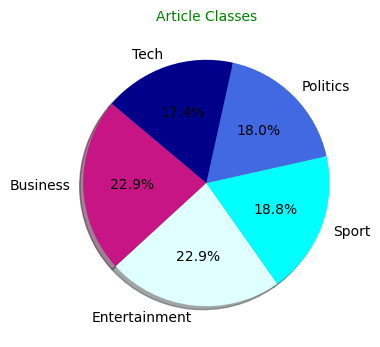

In [2281]:
whole_result('ct')

In [2284]:
#Data scatter is fair


	_________ Model Summary (Original Data) _________

Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_243 (Embedding)    (None, None, 128)         4427392   
_________________________________________________________________
global_max_pooling1d_243 (Gl (None, 128)               0         
_________________________________________________________________
dense_541 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_542 (Dense)            (None, 5)                 165       
Total params: 4,431,685
Trainable params: 4,431,685
Non-trainable params: 0
_________________________________________________________________

	_________ Model Summary (Summarized Data) _________

Model: "sequential_244"
_________________________________________________________________
Layer (type)                 Output Shape 

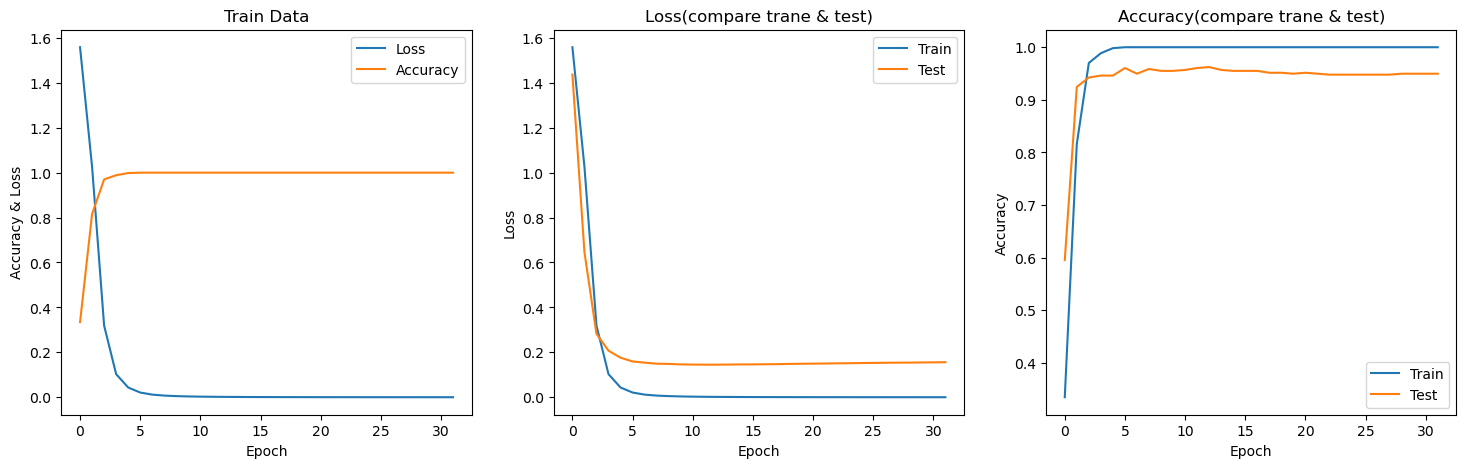


				_________ Model Plot (Summarized Data) _________



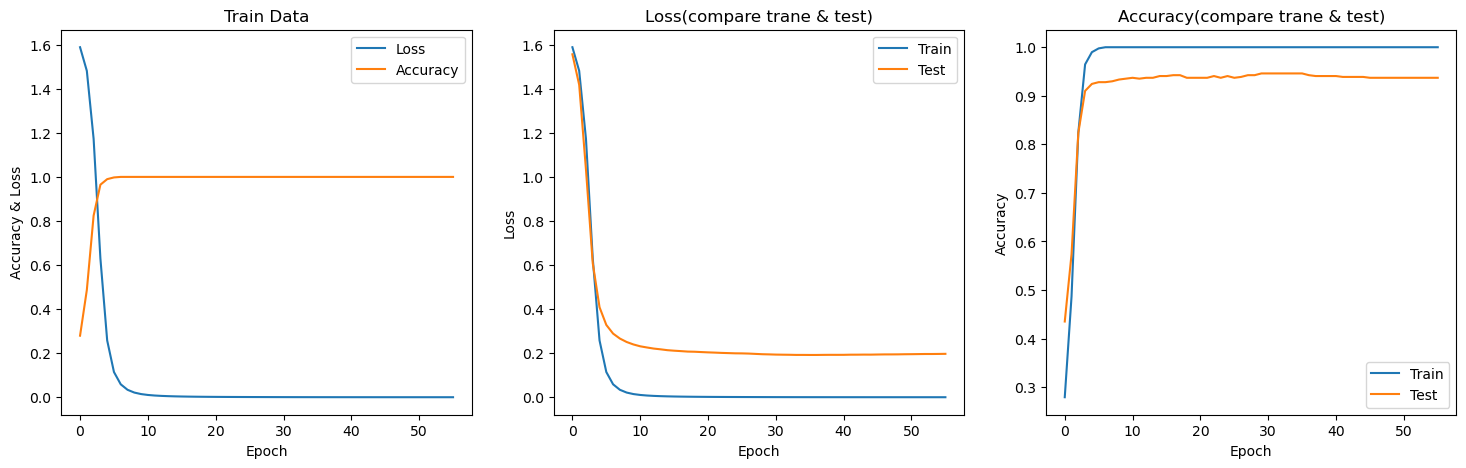

Original Data ===========> Accuracy: 94.96402740478516 % , Loss: 0.15605302155017853
Summarized Data =========> Accuracy: 93.70503425598145 % , Loss: 0.19696399569511414


(None, None, None)

In [2295]:
whole_result('sy1'),whole_result('plt1'),whole_result('eva1')

In [2285]:
whole_result('noi')

noise befor cleaning: 22853.94579063944
noise after cleaning: 1122.3420934819483



	_________ Model Summary (Original Data) _________

Model: "sequential_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_243 (Embedding)    (None, None, 128)         4427392   
_________________________________________________________________
global_max_pooling1d_243 (Gl (None, 128)               0         
_________________________________________________________________
dense_541 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_542 (Dense)            (None, 5)                 165       
Total params: 4,431,685
Trainable params: 4,431,685
Non-trainable params: 0
_________________________________________________________________

	_________ Model summary (Clean Data)  _________

Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape     

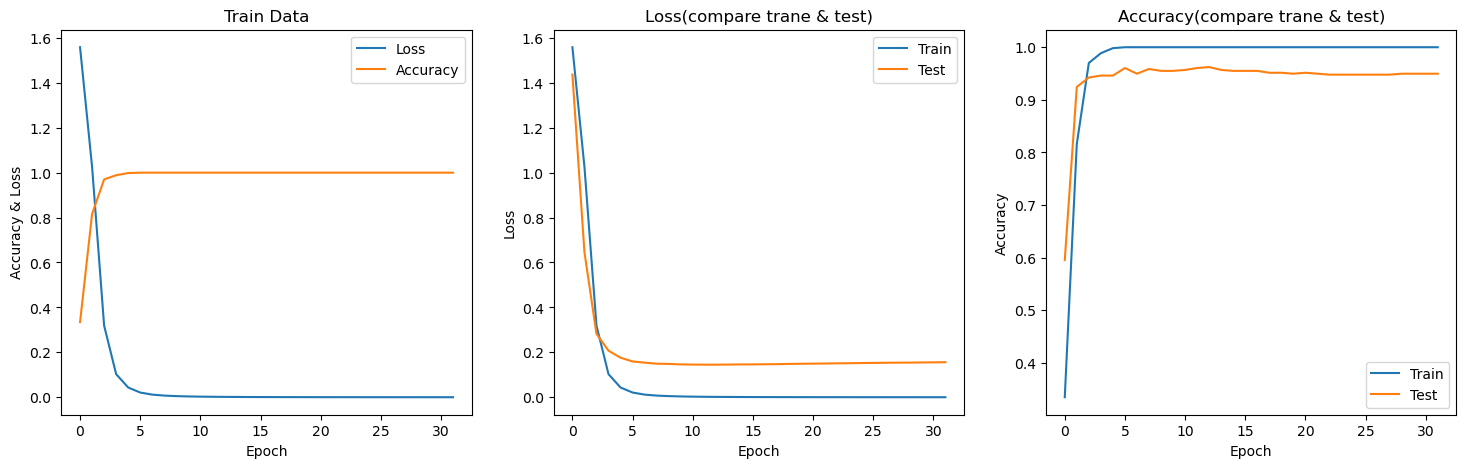


				_________ Model Plot (Clean Data) _________



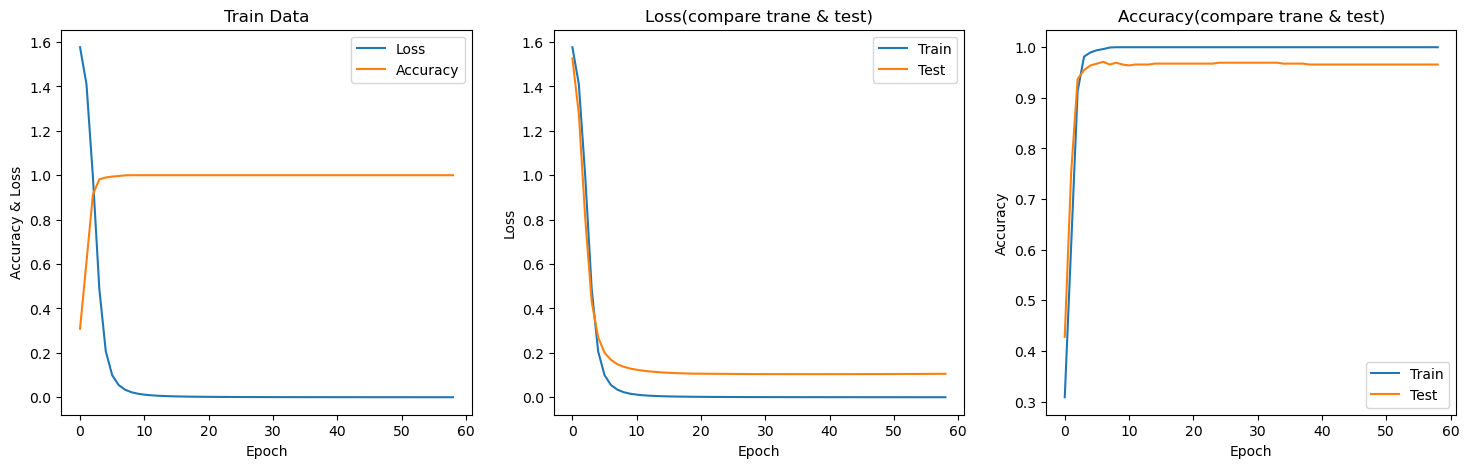

Clean Data ==============> Accuracy: 96.58273458480835 % , Loss: 0.10551268607378006
The Best Model ==========> Accuracy: 97.84172773361206 % , Loss: 0.08962131291627884


(None, None, None)

In [2296]:
whole_result('sy2'),whole_result('plt2'),whole_result('eva2')


	_________ Model summary (Best Model)  _________

Model: "sequential_246"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_246 (Embedding)    (None, None, 200)         6298600   
_________________________________________________________________
masking_38 (Masking)         (None, None, 200)         0         
_________________________________________________________________
global_max_pooling1d_246 (Gl (None, 200)               0         
_________________________________________________________________
dense_547 (Dense)            (None, 45)                9045      
_________________________________________________________________
dropout_340 (Dropout)        (None, 45)                0         
_________________________________________________________________
dense_548 (Dense)            (None, 5)                 230       
Total params: 6,307,875
Trainable params: 6,307,875
Non-trainable p

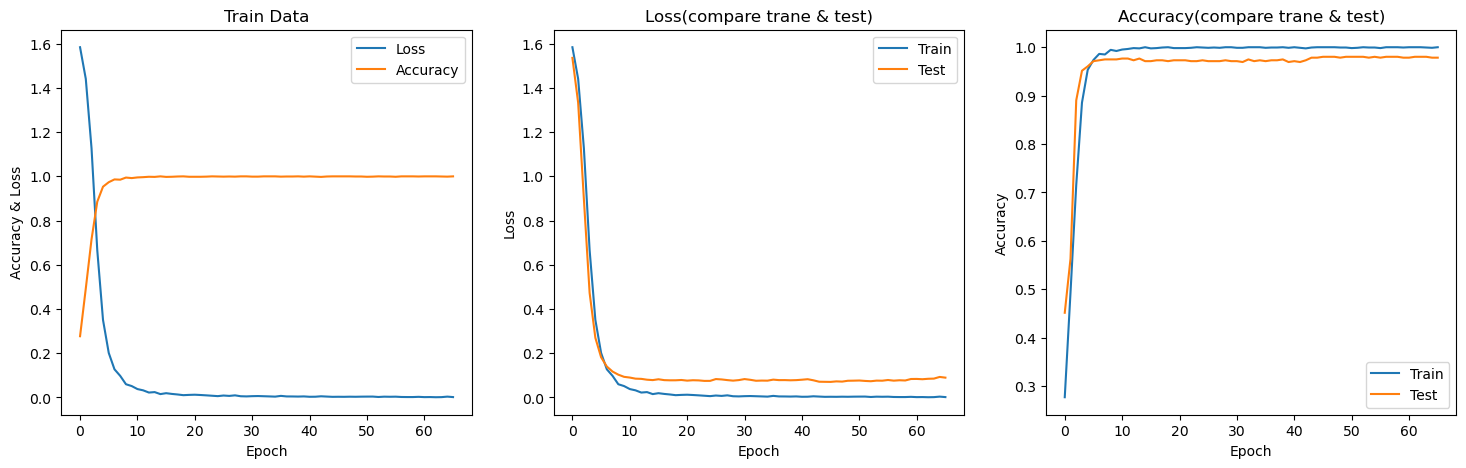

The Best Model ==========> Accuracy: 97.84172773361206 % , Loss: 0.08962131291627884


In [2294]:
whole_result('best')

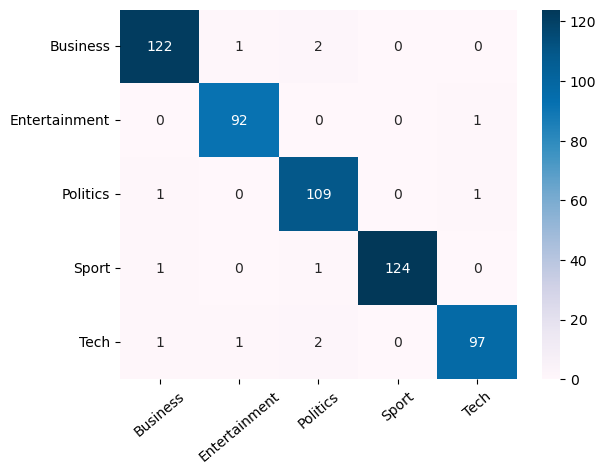

In [2297]:
whole_result('cm')

In [2298]:
whole_result('ml')

KNN_Model Accuracy: 0.6008

DecisionTree_Model Accuracy: 0.8324

RandomForest_Model Accuracy: 0.955

